In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('C:\Inception BD\Data-Science-with-Generative-AI\AI final lab test (VU)\sports_data.csv')

In [3]:
data

,height,weight,class
0,175,65,football
1,171,64,football
2,170,65,football
3,172,65,football
4,185,70,cricket
5,188,72,cricket
6,189,75,cricket
7,190,78,cricket


In [4]:
print(data.shape)

(8, 3)


In [5]:
data.describe()

,height,weight
count,8.000000,8.000000
mean,180.000000,69.250000
std,8.783101,5.338539
min,170.000000,64.000000
25%,171.750000,65.000000
50%,180.000000,67.500000
75%,188.250000,72.750000
max,190.000000,78.000000


In [6]:
data['height']

0    175
1    171
2    170
3    172
4    185
5    188
6    189
7    190
Name: height, dtype: int64

In [7]:
data['weight']

0    65
1    64
2    65
3    65
4    70
5    72
6    75
7    78
Name: weight, dtype: int64

In [8]:
data_dict={}
for i in data['class'].unique():
    data_dict[i]=data[data['class']==i][['height','weight']].values.tolist()

In [9]:
data_dict

{'football': [[175, 65], [171, 64], [170, 65], [172, 65]],
 'cricket': [[185, 70], [188, 72], [189, 75], [190, 78]]}

football
[175, 65]
[171, 64]
[170, 65]
[172, 65]
cricket
[185, 70]
[188, 72]
[189, 75]
[190, 78]


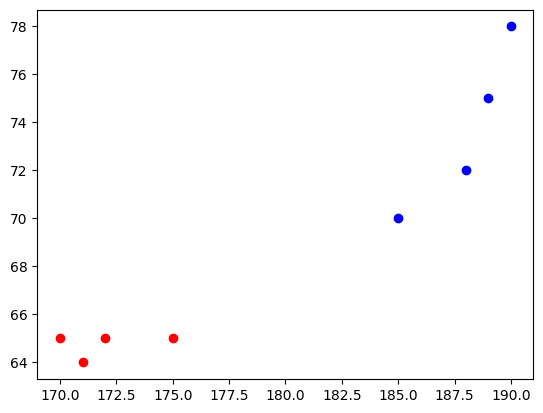

In [10]:
import matplotlib.pyplot as plt

for class_name in data_dict:
    print(class_name)
    for sample in data_dict[class_name]:
        print(sample)
        plt.scatter(sample[0],sample[1],label=class_name,color=('b' if class_name=='cricket' else 'r'))
plt.show()

In [11]:
def ScatterPlot(dict,new_sample):
    for class_name in dict:
        for sample in dict[class_name]:
            plt.scatter(sample[0],sample[1],label=class_name,color=('b' if class_name=='cricket' else 'r'))
        plt.scatter(new_sample[0],new_sample[1],color='g',marker='*',s=100)
    plt.show()

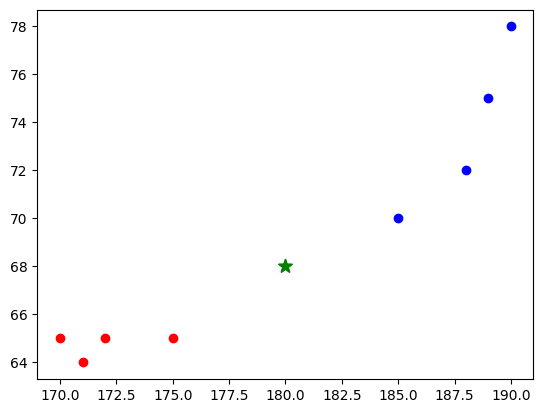

In [12]:
ScatterPlot(data_dict,[180,68])

In [13]:
import numpy as np
import collections as col
def KNN(dictionary,new_samples,k):
    distances=[]
    for class_name in dictionary:
        for sample in dictionary[class_name]:
            #distance=((sample[0]-new_samples[0])**2+(sample[1]-new_samples[1])**2)**0.5
            distance=np.linalg.norm(np.array(sample)-np.array(new_samples))
            distances.append([distance,class_name])
            distances=sorted(distances)[:k]
            votes=[distance[1] for distance in distances]
            vote_result=col.Counter(votes).most_common(1)[0][0]
    print(votes)
    print(distances)
    print(vote_result)

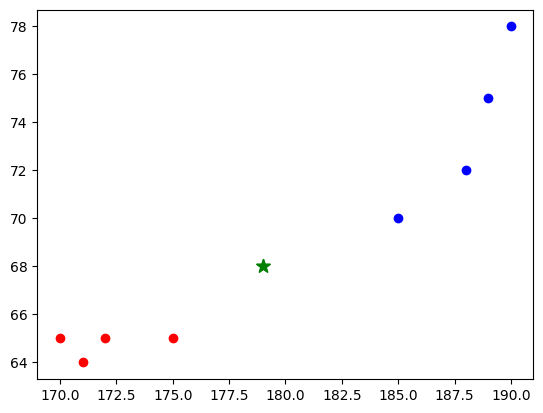

['football', 'cricket', 'football']
[[np.float64(5.0), 'football'], [np.float64(6.324555320336759), 'cricket'], [np.float64(7.615773105863909), 'football']]
football


In [14]:
ScatterPlot(data_dict,[179,68])
KNN(data_dict,[179,68],3)